In [2]:
import pandas as pd
import matplotlib
from datapackage import Package
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from iso3166 import countries

package = Package('https://datahub.io/core/country-list/datapackage.json')

# print list of all resources:
#print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        content = resource.read()
ISO_Alpha2_Country_Mapping = {item[1]:item[0] for item in content}
ISO_Alpha2_Country_Mapping['KR']='Korea' #From 'Korea, Republic of' to Korea

In [3]:
!source activate python38

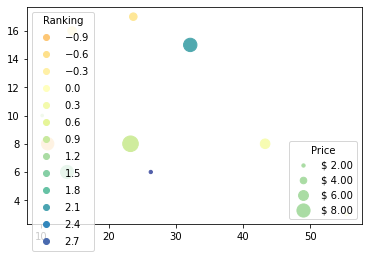

In [4]:
volume = np.random.rayleigh(27, size=10)
amount = np.random.poisson(10, size=10)
ranking = np.random.normal(size=10)
price = np.random.uniform(1, 10, size=10)

fig, ax = plt.subplots()

# Because the price is much too small when being provided as size for ``s``,
# we normalize it to some useful point sizes, s=0.3*(price*3)**2
scatter = ax.scatter(volume, amount, c=ranking, s=0.3*(price*3)**2,
                     vmin=-3, vmax=3, cmap="Spectral")

# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Ranking")
ax.add_artist(legend1)

# Produce a legend for the price (sizes). Because we want to show the prices
# in dollars, we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.
kw = dict(prop="sizes", num=5, color=scatter.cmap(0.7), fmt="$ {x:.2f}",
          func=lambda s: np.sqrt(s/.3)/3)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Price")

plt.show()

In [ ]:
dfCountryBoxplot = pd.DataFrame(columns=countryList)

In [ ]:
df_uniqueVideoID= df.drop_duplicates("video_id")

In [ ]:
uniqueVideoList=[]
for videoid in df_uniqueVideoID["video_id"]:
    uniqueVideoList.append(videoid)

In [ ]:
dfCountryBoxplot["video_id"]=uniqueVideoList
dfCountryBoxplot.head()

In [ ]:
#countryC= "GB"
list1=[]
for countryC in countryCodeList:
    for videoid in uniqueVideoList:
        try:
            dftemp= df[(df["viewing_country"]==countryC) & (df["video_id"]==videoid)]
            list1.append(dftemp["Total_Trend_Days"])
        except:
            list1.append(0)
    dfCountryBoxplot[ISO_Alpha2_Country_Mapping[countryC]]=list1
    list1=[]

In [ ]:
#OneHotEncoder from SciKit library only takes numerical categorical values, 
#hence any value of string type should be label encoded before one hot encoded.
def encoding(DataFrame, list_of_label_encoding=None, list_of_onehot_encoding=None, drop_first_col=None):
    #This function takes a DF, list of to be label encoding columns, list of one hot encoding columns, 
    #list of  columns with first value to be dropped (in case of binary)
    #Reference:- #https://stats.stackexchange.com/questions/438875/one-hot-encoding-of-a-binary-feature-when-using-xgboost
    #New:- New Data (Need to use the same encoding)
    #Label_Encoder:- Only for new Data
    
    DF = DataFrame.copy()
    Dict_Label_Enc = dict()
    
    if list_of_label_encoding:
        Label_enc = LabelEncoder()
        for col in list_of_label_encoding:
            Label_enc.fit(DF[col])
            DF.loc[:,col] = Label_enc.transform(DF[col])
            Dict_Label_Enc[col] = deepcopy(Label_enc)
       
    if list_of_onehot_encoding:
        no_drop = (list(set(list_of_onehot_encoding).difference(set(drop_first_col))) if drop_first_col else list_of_onehot_encoding)
        DF= pd.get_dummies(DF, columns=no_drop )
        if drop_first_col: 
            DF = pd.get_dummies(DF, columns=drop_first_col, drop_first=True)
        
    return DF, Dict_Label_Enc